In [2]:
import xarray as xr

# Load the GRIB file
file_path = "22e7a5177aa05425bfc8e4399e9a4fc.grib"

# Try loading with cfgrib
try:
    ds = xr.open_dataset(file_path, engine='cfgrib')
    print("GRIB File successfully loaded ✅")
except Exception as e:
    print(f"Failed to load GRIB file: {e}")
    raise


skipping variable: paramId==228 shortName='tp'
Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\cfgrib\dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\cfgrib\dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1420070400, 1420081200, 1420092000, ..., 1749254400, 1749265200,
       1749276000])) new_value=Variable(dimensions=('time',), data=array([1420048800, 1420092000, 1420135200, ..., 1749146400, 1749189600,
       1749232800]))


GRIB File successfully loaded ✅


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


In [3]:
# Print basic info
print(ds)

# Print all variable names
print("Variables in dataset:", list(ds.data_vars))

# Optionally, print detailed attributes of each variable
for var in ds.data_vars:
    print(f"\n--- {var} ---")
    print(ds[var])


<xarray.Dataset> Size: 610kB
Dimensions:     (time: 30483, latitude: 1, longitude: 1)
Coordinates:
    number      int32 4B ...
  * time        (time) datetime64[ns] 244kB 2015-01-01 ... 2025-06-07T06:00:00
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 8B 30.46
  * longitude   (longitude) float64 8B 79.51
    valid_time  (time) datetime64[ns] 244kB ...
Data variables:
    t2m         (time, latitude, longitude) float32 122kB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-12T13:09 GRIB to CDM+CF via cfgrib-0.9.1...
Variables in dataset: ['t2m']

--- t2m ---
<xarray.DataArray 't2m' (time: 30483, latitude: 1, longitude: 1)> Size: 122kB
[3

In [6]:
import folium

# Extract the single point location from your dataset
lat = float(ds.latitude.values)
lon = float(ds.longitude.values)

print(f"Plotting marker at Latitude: {lat}, Longitude: {lon}")

# Create a folium map centered at the point
m = folium.Map(location=[lat, lon], zoom_start=10)

# Add a marker at the point location
folium.Marker(
    location=[lat, lon],
    popup=f"ERA5 Point\nLat: {lat}, Lon: {lon}",
    tooltip="ERA5 Time Series Location 📍",
    icon=folium.Icon(color="blue", icon="info-sign")
).add_to(m)

# Display the map (will render inline in Jupyter)
m


Plotting marker at Latitude: 30.46, Longitude: 79.51


C:\Users\Asus\AppData\Local\Temp\ipykernel_16240\1326782252.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lat = float(ds.latitude.values)
C:\Users\Asus\AppData\Local\Temp\ipykernel_16240\1326782252.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lon = float(ds.longitude.values)


In [9]:
import cfgrib

grib_path = "22e7a5177aa05425bfc8e4399e9a4fc.grib"

# Open all datasets (one per message group)
datasets = cfgrib.open_datasets(grib_path)

# List shortNames from each sub-dataset
print(f"Found {len(datasets)} datasets/messages:")

for i, ds in enumerate(datasets):
    print(f"\nDataset {i+1}:")
    for var in ds.data_vars:
        print(f" - Variable: {var}")
    print(ds.attrs.get('GRIB_shortName', ''))


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Found 2 datasets/messages:

Dataset 1:
 - Variable: t2m


Dataset 2:
 - Variable: tp



C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


In [12]:
import xarray as xr

grib_path = "22e7a5177aa05425bfc8e4399e9a4fc.grib"

# Load temperature
ds_t2m = xr.open_dataset(
    grib_path,
    engine="cfgrib",
    backend_kwargs={"filter_by_keys": {"shortName": "2t"}}
)

# Load precipitation
ds_tp = xr.open_dataset(
    grib_path,
    engine="cfgrib",
    backend_kwargs={"filter_by_keys": {"shortName": "tp"}}
)

# ✅ Drop 'valid_time' from both
if 'valid_time' in ds_t2m.variables:
    ds_t2m = ds_t2m.drop_vars('valid_time')

if 'valid_time' in ds_tp.variables:
    ds_tp = ds_tp.drop_vars('valid_time')

# Rename for clarity
ds_t2m = ds_t2m.rename({'t2m': 'temperature_2m'})
ds_tp = ds_tp.rename({'tp': 'total_precipitation'})

# Unit conversions
ds_t2m['temperature_2m'] = ds_t2m['temperature_2m'] - 273.15
ds_t2m['temperature_2m'].attrs['units'] = '°C'

if ds_tp['total_precipitation'].attrs.get('units', '') == 'm':
    ds_tp['total_precipitation'] *= 1000
    ds_tp['total_precipitation'].attrs['units'] = 'mm'

# ✅ Merge with confidence
ds_combined = xr.merge([ds_t2m, ds_tp], compat='override')

# Preview result
print(ds_combined)


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


<xarray.Dataset> Size: 854kB
Dimensions:              (time: 30484, latitude: 1, longitude: 1, step: 4)
Coordinates:
  * time                 (time) datetime64[ns] 244kB 2014-12-31T18:00:00 ... ...
  * latitude             (latitude) float64 8B 30.46
  * longitude            (longitude) float64 8B 79.51
    number               int32 4B ...
  * step                 (step) timedelta64[ns] 32B 03:00:00 ... 12:00:00
    surface              float64 8B ...
Data variables:
    temperature_2m       (time, latitude, longitude) float32 122kB nan ... 19.42
    total_precipitation  (time, step, latitude, longitude) float32 488kB nan ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-12T14:17 GRIB to CDM+CF 

In [13]:
# Collapse the 'step' dimension to get total precipitation per time step
precip_total = ds_combined['total_precipitation'].sum(dim='step', skipna=True)

# Store it back for plotting
ds_combined['precip_collapsed'] = precip_total
ds_combined['precip_collapsed'].attrs['long_name'] = "Total Precipitation (Collapsed over step)"
ds_combined['precip_collapsed'].attrs['units'] = ds_combined['total_precipitation'].attrs.get('units', 'mm')


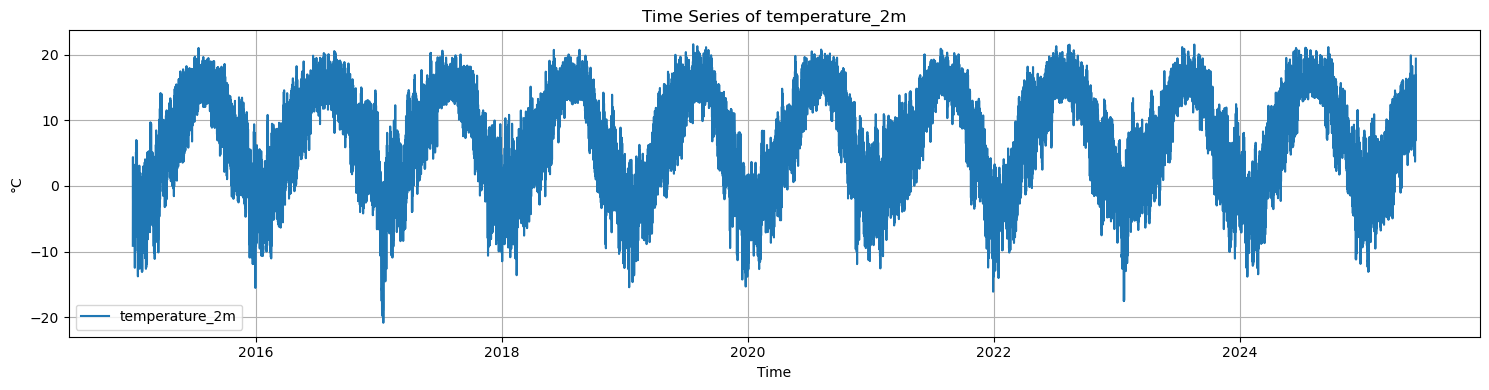

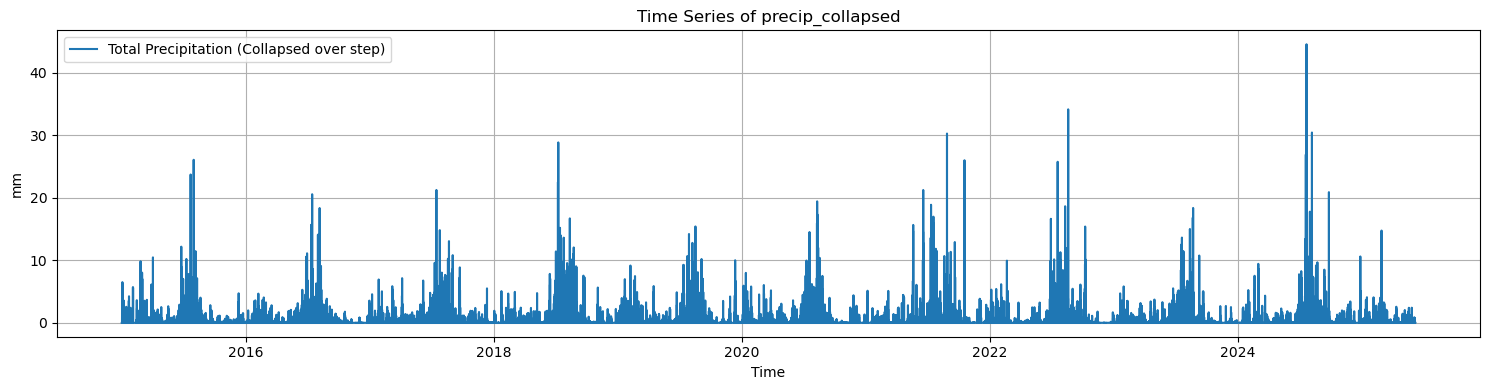

In [14]:
import matplotlib.pyplot as plt

def plot_time_series(var_name):
    data = ds_combined[var_name].squeeze()  # remove lat/lon dims
    plt.figure(figsize=(15, 4))
    plt.plot(data['time'], data, label=ds_combined[var_name].attrs.get('long_name', var_name), color='tab:blue')
    plt.xlabel("Time")
    plt.ylabel(f"{ds_combined[var_name].attrs.get('units', '')}")
    plt.title(f"Time Series of {var_name}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot temperature
plot_time_series("temperature_2m")

# Plot collapsed precipitation
plot_time_series("precip_collapsed")


In [16]:
pip install numcodecs


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
import xarray as xr
import zarr
import os
from numcodecs import Blosc

# Path to save the .zarr store
zarr_path = "2_Temp_Precip_dynamic_data_2.zarr"

# Select cleaned variables
ds_zarr = ds_combined[["temperature_2m", "precip_collapsed"]]

# Chunking
chunks = {"time": 1000}

# Compression
compressor = Blosc(cname='zstd', clevel=3, shuffle=Blosc.SHUFFLE)
encoding = {
    var: {"compressor": compressor}
    for var in ds_zarr.data_vars
}

# Remove existing
if os.path.exists(zarr_path):
    import shutil
    shutil.rmtree(zarr_path)

# ✅ Save using Zarr v2 explicitly
ds_zarr.chunk(chunks).to_zarr(
    zarr_path,
    mode='w',
    consolidated=True,
    encoding=encoding,
    zarr_format=2  # 🔥 fix: force classic Zarr format
)

print(f"✅ Zarr dataset successfully saved to: {zarr_path}")


✅ Zarr dataset successfully saved to: 2_Temp_Precip_dynamic_data_2.zarr
